In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
from google.colab import drive


file_path = "/content/drive/My Drive/Creditcard/creditcard.csv"  # Replace 'filename.csv' with your actual file name
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(df.head())


Dataset Loaded Successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

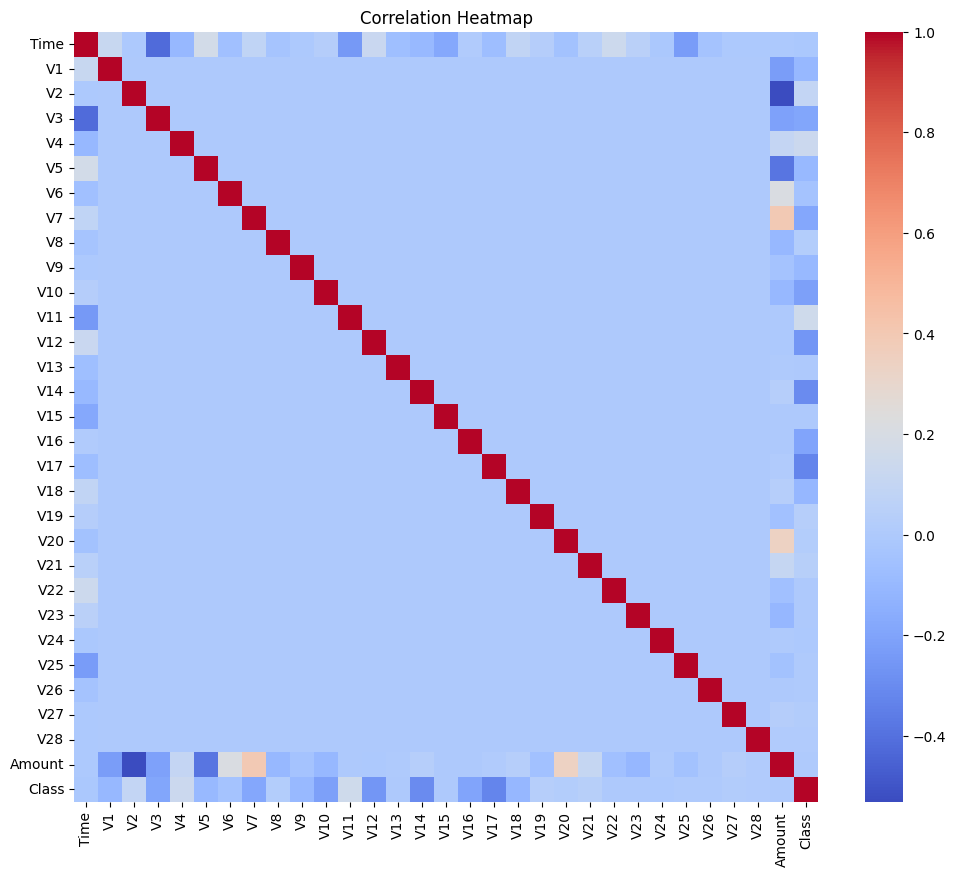

In [11]:
import seaborn as sns

# Plot correlation heatmap for the original dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


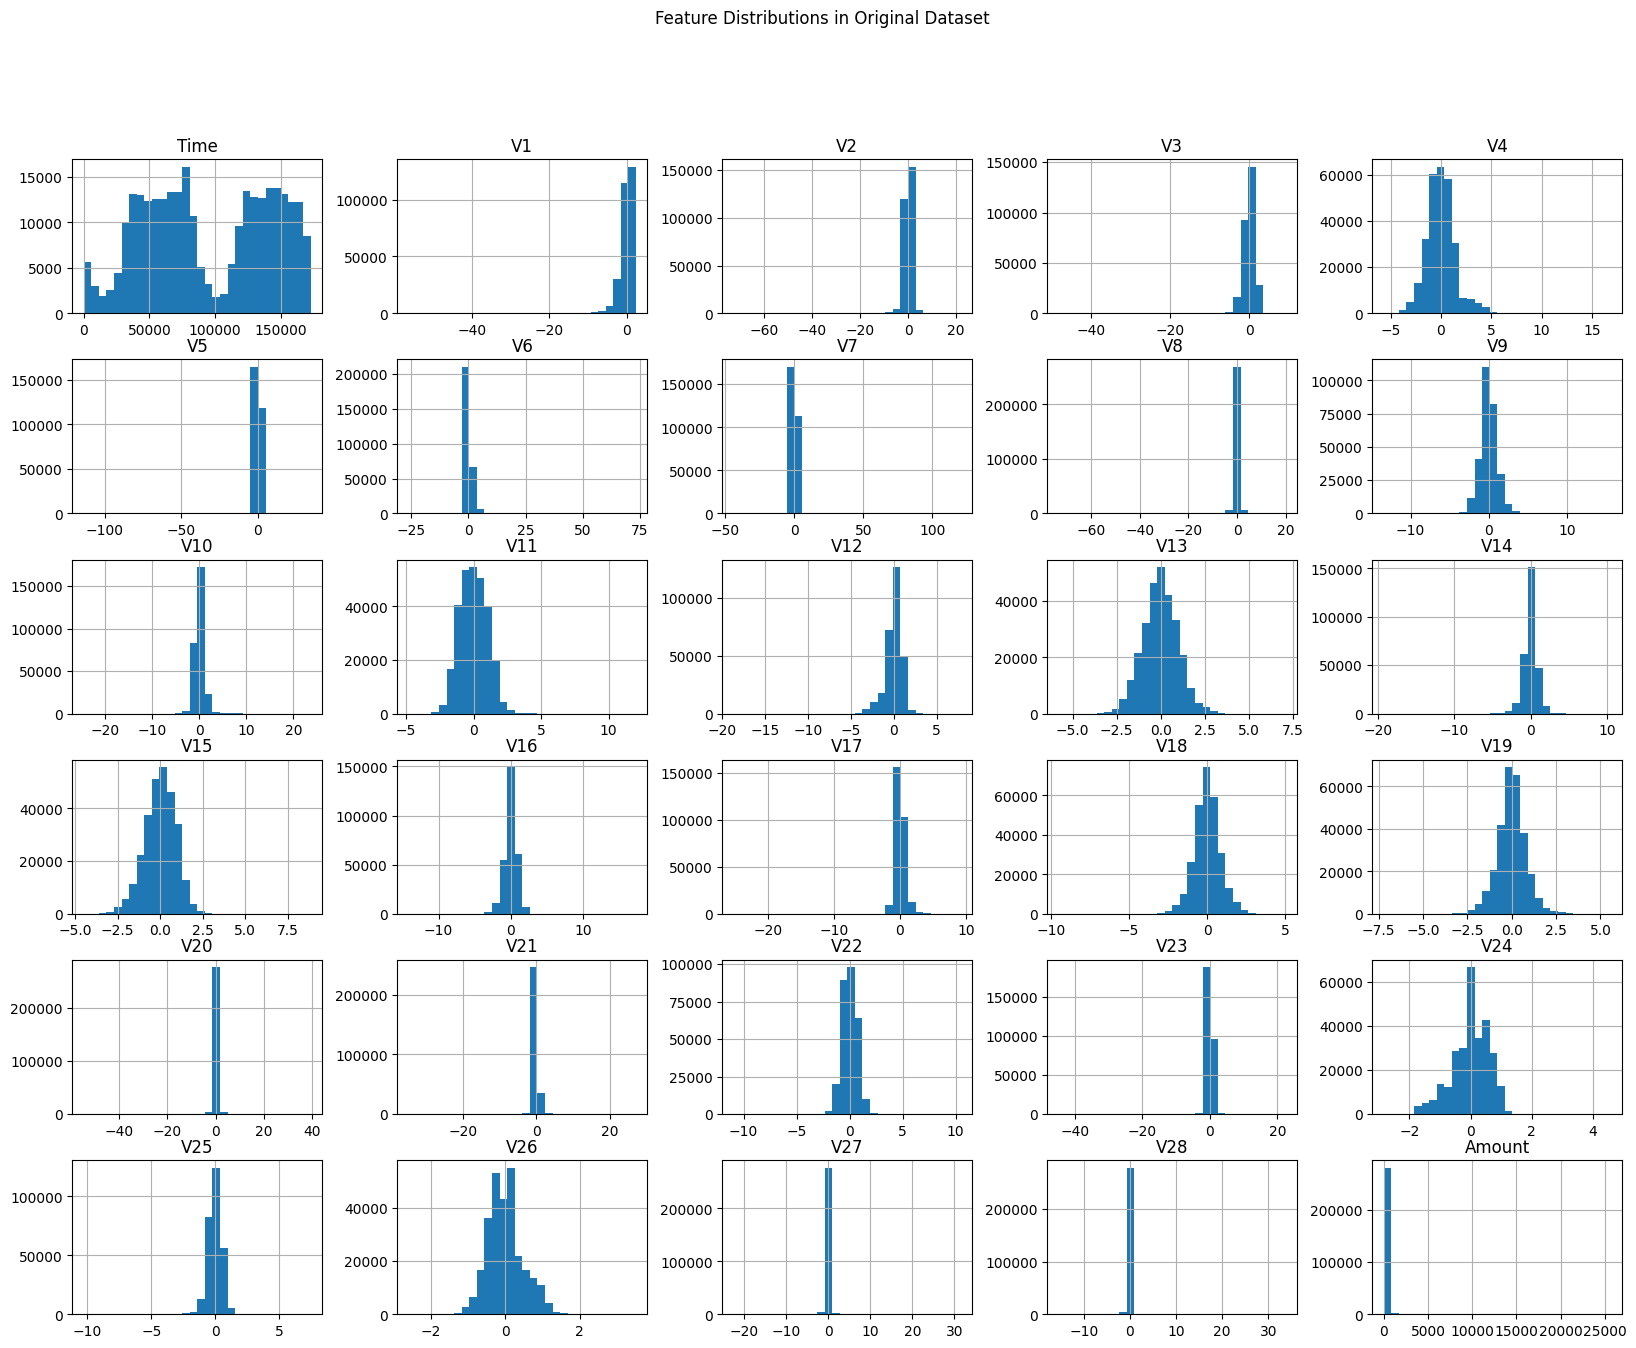

In [12]:
# Plot distributions for all features
df.drop(columns=['Class']).hist(figsize=(20, 15), bins=30)
plt.suptitle('Feature Distributions in Original Dataset')
plt.show()


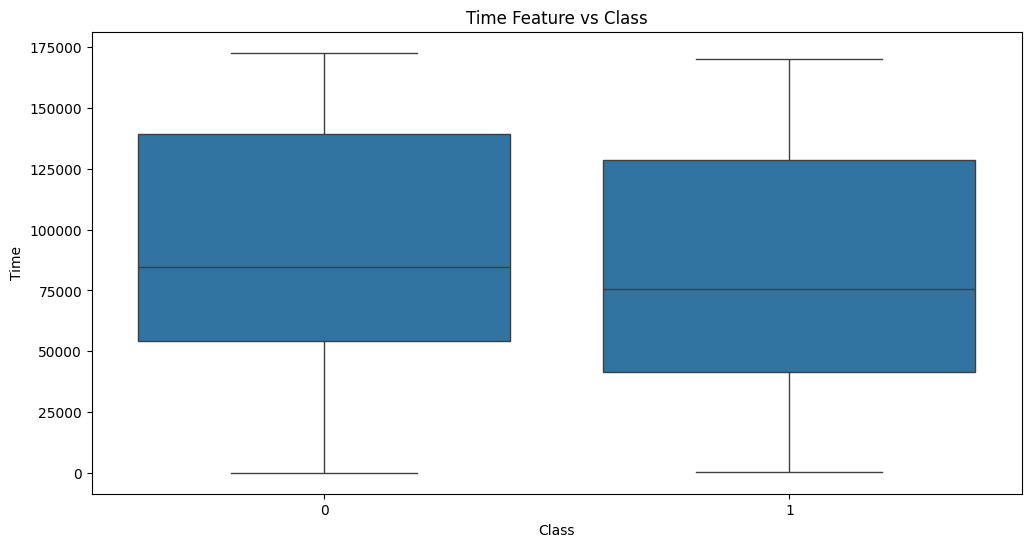

In [14]:
# Check for trends in 'Time' with respect to the Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Time Feature vs Class')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()


In [15]:
# Statistical summary of the original dataset
print("Statistical Summary of Original Dataset:")
print(df.describe())

# Check skewness and kurtosis of features
print("\nSkewness of features:")
print(df.drop(columns=['Class']).skew())

print("\nKurtosis of features:")
print(df.drop(columns=['Class']).kurt())


Statistical Summary of Original Dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
s

Class
0    284315
1       492
Name: count, dtype: int64


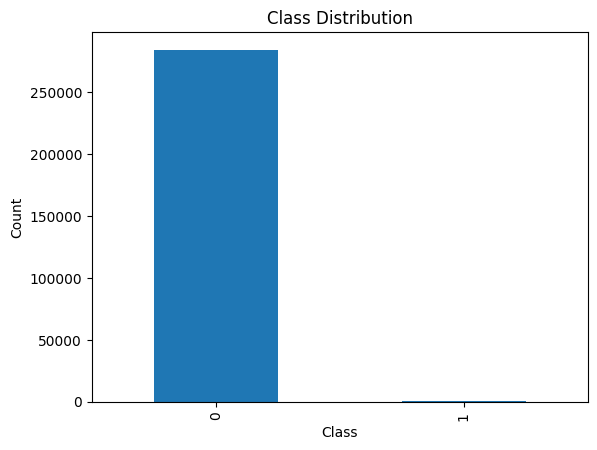

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
# data = pd.read_csv('creditcard.csv')

# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize the imbalance
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [4]:
import pandas as pd
from imblearn.combine import SMOTEENN  # SMOTE + Edited Nearest Neighbors
from sklearn.model_selection import train_test_split
from collections import Counter


# Separate features and target
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Before resampling:")
print(f"Training class distribution: {Counter(y_train)}")

# Apply combined SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("\nAfter resampling:")
print(f"Resampled training class distribution: {Counter(y_resampled)}")



Before resampling:
Training class distribution: Counter({0: 227451, 1: 394})

After resampling:
Resampled training class distribution: Counter({1: 218370, 0: 209282})


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


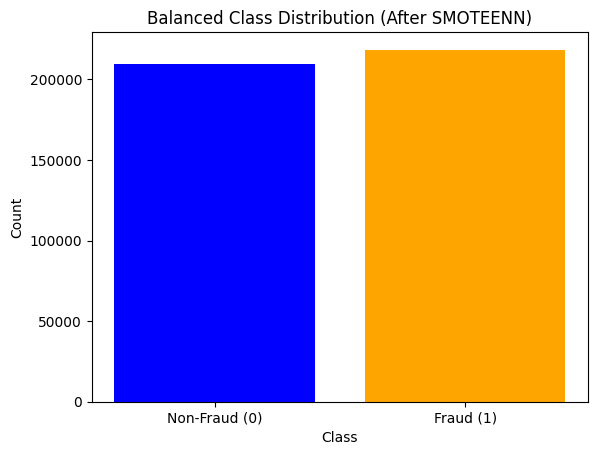

In [10]:
from collections import Counter

# Visualize the balanced dataset class distribution
counter = Counter(y_resampled)
plt.bar(counter.keys(), counter.values(), color=['blue', 'orange'])
plt.title('Balanced Class Distribution (After SMOTEENN)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()


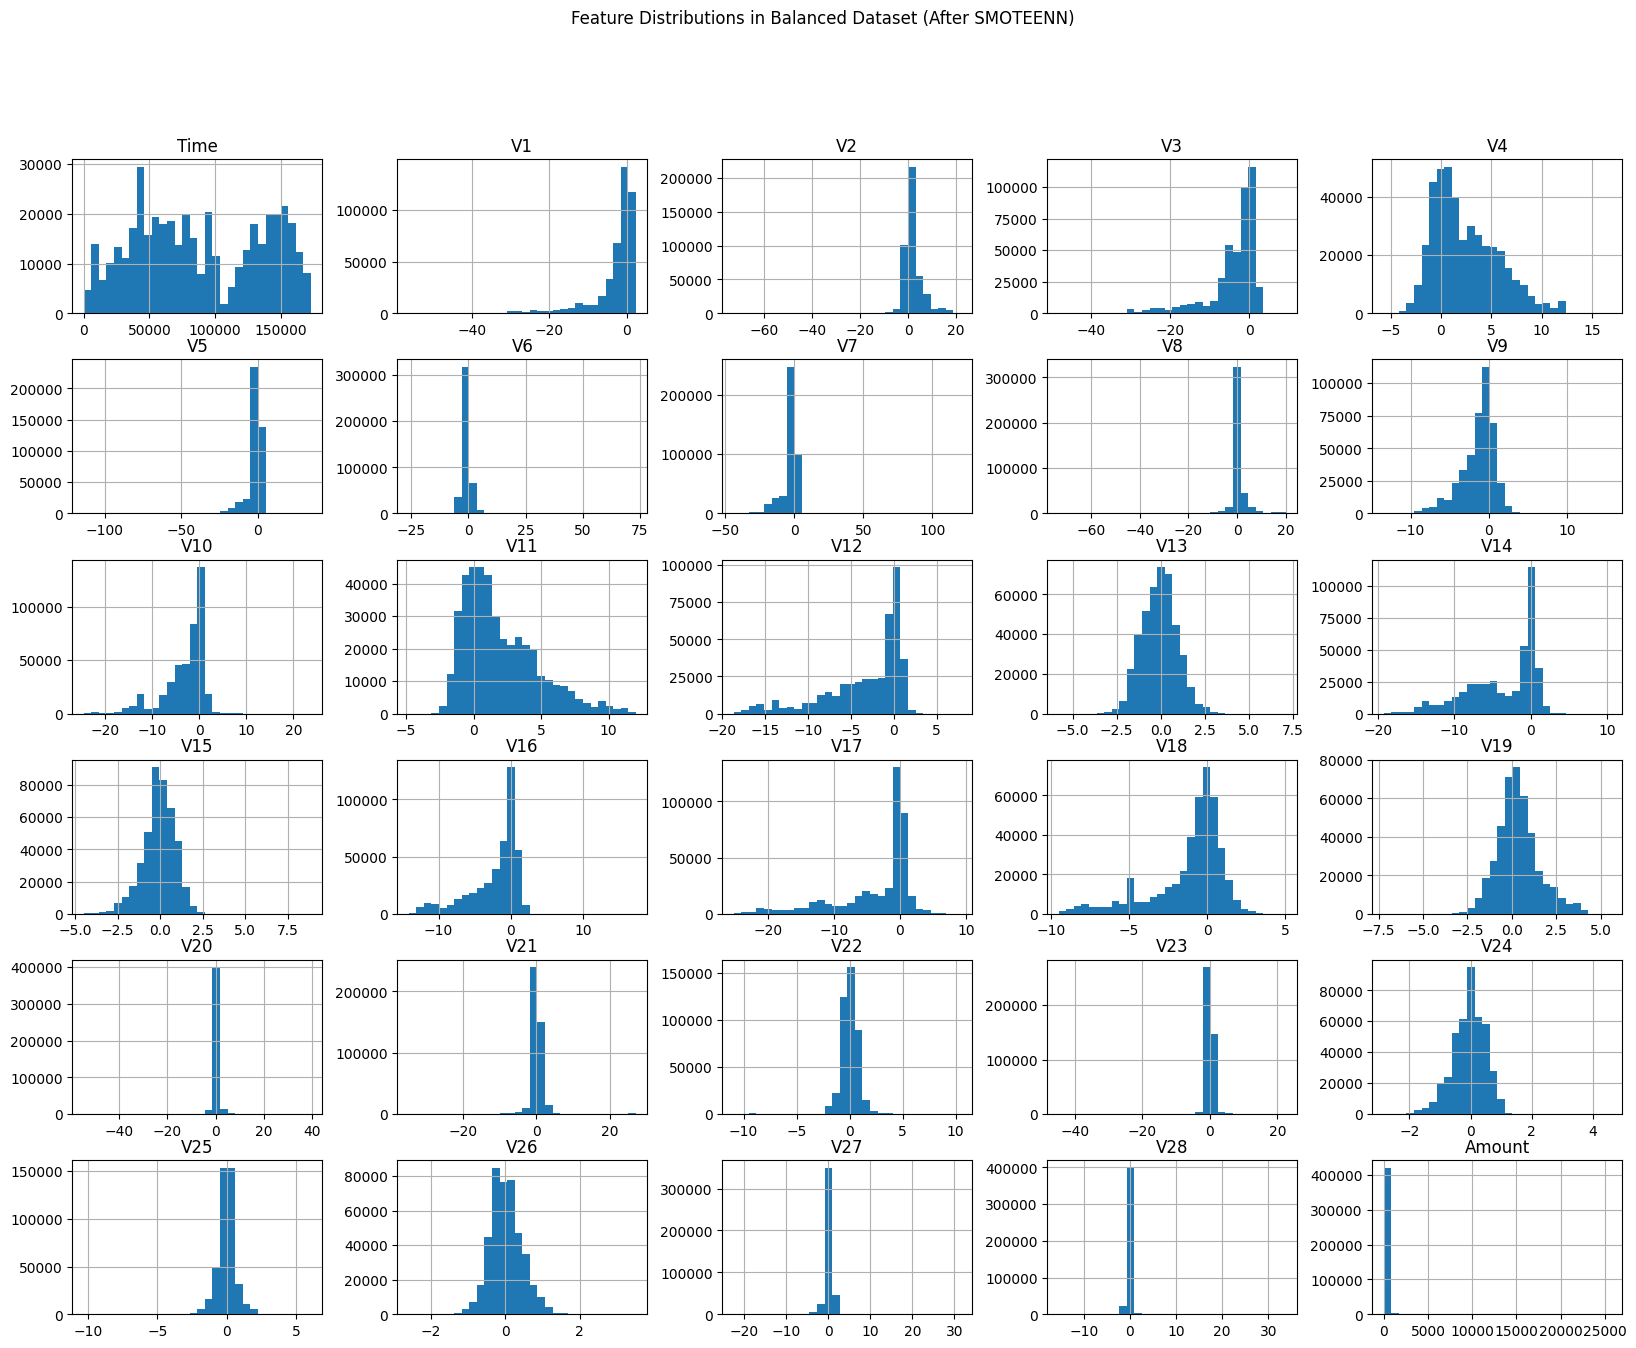

In [13]:
# Convert resampled data into a DataFrame for visualization
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Plot distributions for resampled data
X_resampled_df.hist(figsize=(20, 15), bins=30)
plt.suptitle('Feature Distributions in Balanced Dataset (After SMOTEENN)')
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the resampled data
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors for better performance
knn.fit(X_resampled_scaled, y_resampled)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.84      0.57        98

    accuracy                           1.00     56962
   macro avg       0.72      0.92      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56758   106]
 [   16    82]]


In [17]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Use eval_metric to avoid warnings
xgb.fit(X_resampled_scaled, y_resampled)

# Predict on the test data
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56836    28]
 [   13    85]]


In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM (3D input: samples, timesteps, features)
X_train_lstm = X_resampled_scaled.reshape((X_resampled_scaled.shape[0], 1, X_resampled_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train_lstm, y_resampled, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test))

# Predict on the test data
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9604 - loss: 0.1074 - val_accuracy: 0.9940 - val_loss: 0.0227
Epoch 2/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9963 - val_loss: 0.0146
Epoch 3/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9975 - val_loss: 0.0117
Epoch 4/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9976 - loss: 0.0083 - val_accuracy: 0.9976 - val_loss: 0.0106
Epoch 5/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9983 - val_loss: 0.0091
Epoch 6/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9987 - val_loss: 0.0086
Epoch 7/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9985 - val_loss: 0.0098
Epoch 8/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9991 - loss: 0

In [19]:
from sklearn.ensemble import VotingClassifier

# Wrap LSTM into a custom classifier (optional, as it's a deep learning model)
class LSTMClassifier:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        predictions = self.model.predict(X)
        return (predictions > 0.5).astype(int).flatten()

lstm_clf = LSTMClassifier(model)

# Combine KNN and XGBoost (excluding LSTM here due to compatibility with VotingClassifier)
ensemble = VotingClassifier(estimators=[
    ('knn', knn),
    ('xgb', xgb),
], voting='hard')

# Train ensemble
ensemble.fit(X_resampled_scaled, y_resampled)

# Predict using ensemble
y_pred_ensemble = ensemble.predict(X_test_scaled)

# Evaluate ensemble
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
 # Predict probabilities for KNN
y_proba_knn = knn.predict_proba(X_test_scaled)  # Output shape: (n_samples, 2)

# Predict probabilities for XGBoost
y_proba_xgb = xgb.predict_proba(X_test_scaled)  # Output shape: (n_samples, 2)

# Predict probabilities for LSTM
y_proba_lstm = model.predict(X_test_lstm)  # Output shape: (n_samples, 1)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [21]:
# Calculate average probabilities (equal weights)
average_proba = (y_proba_knn[:, 1] + y_proba_xgb[:, 1] + y_proba_lstm.flatten()) / 3

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5  # Default decision threshold
y_pred_average = (average_proba >= threshold).astype(int)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the ensemble predictions
print("Average Ensemble Classification Report:")
print(classification_report(y_test, y_pred_average))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_average))


Average Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56835    29]
 [   15    83]]
